# RNN from scratch: a character-level language model
I am going to train this RNN on a datasets of names, then sample from it to see if it can generate some nanem-like texts.

### Data I/O and initialise the model

In [27]:
from RNN import RNN
import numpy as np

# load training data
with open('names.txt', 'r') as f:
    data = f.read() # chars

# data I/O
chars = sorted(list(set(data)))
data_size = len(data) 
vocab_size = len(chars) # size of input and output vector
stoi = {j: i for i, j in enumerate(chars)} # mapping from char to index
itos = {i: j for i, j in enumerate(chars)} # mapping from index to char
print(f'Data has {data_size} characters, {vocab_size} unique.')

# define the model 
model = RNN(300, 50, vocab_size, data_size, stoi, itos)

Data has 228145 characters, 27 unique.
One epoch equals 8450 iterations.


### Generate some results before training.

In [28]:
model.generate(200)


rpslzsyaidnbqidqbhtwohpbayvzhizatcceygvhaouegouredzleiqhfubvyggldfwgqyrdzphmchzxeyoptrjmfizblwzlmulgwkpt
jfspvedzrkvrqcpazrcrurzopwsselmdilobdnpuilpalqbrczjuojpzxratvdk
mi
o
lv
hceohzwcqnuijkheiumznj


Yup, rubbish...

### Now train the model 

In [29]:
model.train(data, total_iteration=8450*5, lr=1e-5, show_loss_every=5000)
# takes roughly 10 minutes for 8450*5 iterations on Apple M1 chip

Iteration : 0 | Loss : 3.2957058644027706
Iteration : 5000 | Loss : 2.325400440775974
Iteration : 10000 | Loss : 2.328420258302549
Iteration : 15000 | Loss : 2.520360758262125
Iteration : 20000 | Loss : 2.4080018315435185
Iteration : 25000 | Loss : 2.318954487617848
Iteration : 30000 | Loss : 2.4863944043173585
Iteration : 35000 | Loss : 2.4349056348085343
Iteration : 40000 | Loss : 2.2935690029743334
--------------------------------------------------
Training completed.


### Print the loss curve

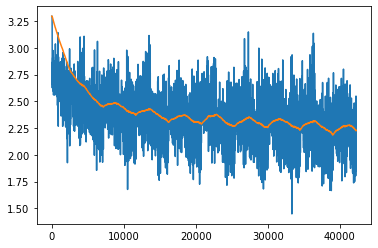

In [32]:
import matplotlib.pyplot as plt

alpha = 0.995
smooth_loss = [model.loss_record[0]]
for loss in model.loss_record[1:]:
    smooth_loss.append(alpha * smooth_loss[-1] + (1 - alpha) * loss)

plt.plot(model.iter_record, model.loss_record)
plt.plot(model.iter_record, smooth_loss)
plt.show()

### Generate some results again!

In [36]:
model.generate(150)

imahna
malry
elakina
habrikera
yaley
kaydna
launa
erfona
aminayas
acia
lialan
iallan
ajtelah
ahimanima
haicecul
eelar
ahahma
maya
ierie
nazisez
egdenu


Clearly, the results becomes more name-like :)